# Добрый, добрый Python с Сергеем Балакиревым

In [1]:
from IPython.display import display

- Некоторые лайфхаки буду помечать 'полезный приём' (cntrl+F)

## 5.8 Генераторы списков(List comprehention)

Структура

[<способ формирования значения> for <переменная> in <итерируемый объект>]

## 6 Словари, кортежи и множества

### 6.1 Введение в словари

Способы задания:
- `dict(ключ1=значение1, ключ2=значение2, ...)`
- `{'ключ': 'значение'}`

*Ключи* - не изменяемые типы данных;\
*Значения* - любые типы данных;

*Удаление ключа*\
`del d['abc']` *если такой ключ есть*


In [2]:
type({})

dict

In [3]:
dict()

{}

In [4]:
dict(you='ты', we='мы', they='они', us='нам')

{'you': 'ты', 'we': 'мы', 'they': 'они', 'us': 'нам'}

In [5]:
nums = '+71234567890 +71234567854 +61234576890 +52134567890 +21235777890 +21234567110 +71232267890'
nums = nums.split()
d_nums = {}
for i in nums:
    d_nums[i[:2]] = [num for num in nums if i[:2] == num[:2]]

print(*sorted(d_nums.items()))


('+2', ['+21235777890', '+21234567110']) ('+5', ['+52134567890']) ('+6', ['+61234576890']) ('+7', ['+71234567890', '+71234567854', '+71232267890'])


### 6.2 Методы словаря

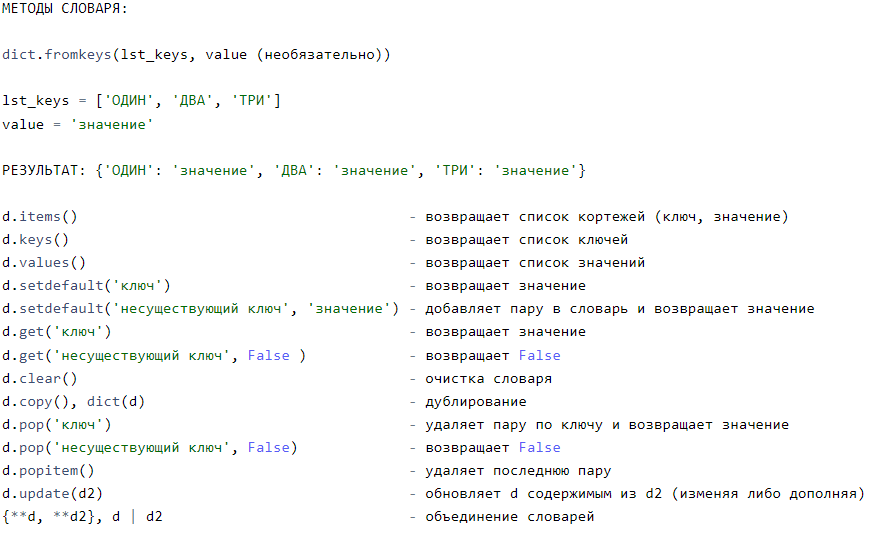

`dict.fromkeys(список[, значение по умолчанию])` \
формирует словарь с заданными ключами, ключи передаются ввиде списка и некоторого значения 

In [6]:
lst = ["+7", "+6", "+5", "+4"]
a = dict.fromkeys(lst)
a

{'+7': None, '+6': None, '+5': None, '+4': None}

чтобы присвоить значение, укажем его

In [7]:
a = dict.fromkeys(lst, 'код страны')
a

{'+7': 'код страны',
 '+6': 'код страны',
 '+5': 'код страны',
 '+4': 'код страны'}

#### Метод для очистки словаря
`a.clear()`

In [8]:
a.clear()
a

{}

In [9]:
d = {True: 1, False: 'Ложь', 'list': [1,2,3], 5: 5}
d

{True: 1, False: 'Ложь', 'list': [1, 2, 3], 5: 5}

In [10]:
d2 = d

*Это ссылка на один и тот же словарь*\
Как сделать копию?

#### Создание копии
`d.copy()`

Посмотрим действительно ли это копия, а не ссылка

In [11]:
d2 = d.copy()
d2['list'] = [5, 6, 7]
d2

{True: 1, False: 'Ложь', 'list': [5, 6, 7], 5: 5}

In [12]:
d

{True: 1, False: 'Ложь', 'list': [1, 2, 3], 5: 5}

*Если бы была ссылка, то значние по ключу `list` было бы одинаковым*\
**Еще один способ создания копии**\
`d2 = dict(d)`

In [13]:
d2 = dict(d)
d2

{True: 1, False: 'Ложь', 'list': [1, 2, 3], 5: 5}

In [14]:
id(d2)

2292771611328

In [15]:
id(d)

2292772278848

#### Получение значения словаря
`d.get('list')`

In [16]:
d.get('list')

[1, 2, 3]

В чём отличие от обычного обращения по ключу(`d['list']`)???

In [17]:
try:
    display(d[3])
except KeyError as mistake:
    print(f'Ошибка\nKeyError: {mistake}')

Ошибка
KeyError: 3


In [18]:
d.get(3)

In [19]:
print(d.get(3))

None


*В случае отсутствия значения функция `dict.get()` не возвращает ошибку, а возвращает значение `None`. Кроме того, функция позволяет указать вторым значением аргумент, который мы возвращаем.*

In [20]:
d.get(3, False)

False

#### Установка по умолчанию
`dict.setdefault(key[, default])`

- возвращает значение по заданному ключу, но если этот ключ в словаре отсутствует, то создаётся запись в словаре с этим **не**существующим ключом и некоторым значением(`default`)


In [21]:
d.setdefault('list')

[1, 2, 3]

In [22]:
d

{True: 1, False: 'Ложь', 'list': [1, 2, 3], 5: 5}

*Словарь d не изменился, как был, так и остался.*\
А вот, если указать несуществующий ключ

In [23]:
d.setdefault(3)

In [24]:
d

{True: 1, False: 'Ложь', 'list': [1, 2, 3], 5: 5, 3: None}

In [25]:
d.setdefault(3)

In [26]:
d

{True: 1, False: 'Ложь', 'list': [1, 2, 3], 5: 5, 3: None}

In [27]:
del d[3]

In [28]:
d

{True: 1, False: 'Ложь', 'list': [1, 2, 3], 5: 5}

---

In [29]:
d.setdefault(3, 'three')

'three'

In [30]:
d

{True: 1, False: 'Ложь', 'list': [1, 2, 3], 5: 5, 3: 'three'}

#### Метод удаления ключа
`d.pop(3)`

- удаляет ключ и возвращает содержимое ключа, может иметь два аргумента

In [31]:
d.pop(3)

'three'

In [32]:
d

{True: 1, False: 'Ложь', 'list': [1, 2, 3], 5: 5}

In [33]:
try:
    display(d.pop('abc'))
except KeyError as mistake:
    print(f'Ошибка\nKeyError: {mistake}')

Ошибка
KeyError: 'abc'


In [34]:
d.pop('abc', False)

False

#### Удаление случайно выбранного ключа
`d.popitem()`

- с версии Python 3.7 удаляет последний ключ в словаре

In [35]:
d.popitem()

(5, 5)

In [36]:
d

{True: 1, False: 'Ложь', 'list': [1, 2, 3]}

In [37]:
d2 = {}
try:
    display(d2.popitem())
except KeyError as mistake:
    print(f'Ошибка\nKeyError: {mistake}')

Ошибка
KeyError: 'popitem(): dictionary is empty'


#### Возвращение списка ключей
`d.keys()`

In [38]:
d = {True: 1, False: 'Ложь', 'list': [1,2,3], 5: 5}
d.keys()

dict_keys([True, False, 'list', 5])

#### Возвращение списка значений
`d.values()`

In [39]:
d.values()

dict_values([1, 'Ложь', [1, 2, 3], 5])

#### Возвращение и ключей и значений
`d.items()`

In [40]:
d.items()

dict_items([(True, 1), (False, 'Ложь'), ('list', [1, 2, 3]), (5, 5)])

#### Обновление словаря
Допустим в программе есть два словаря

In [41]:
d = dict(one = 1, two = 2, three = '3', four = '4')
d

{'one': 1, 'two': 2, 'three': '3', 'four': '4'}

In [42]:
d2 = {2: "неудовлетворительно", 3: "удовлетворительно", 'four': "хорошо", 5: "отлично"}
d2 

{2: 'неудовлетворительно',
 3: 'удовлетворительно',
 'four': 'хорошо',
 5: 'отлично'}

Если мы хотим обновить словарь `d` содержимым словаря `d2`\
для этого существует специальный метод `d.update(d2)`

In [43]:
d.update(d2)
d

{'one': 1,
 'two': 2,
 'three': '3',
 'four': 'хорошо',
 2: 'неудовлетворительно',
 3: 'удовлетворительно',
 5: 'отлично'}

- метод обновил данные по общему ключу `four`, остальные слил воедино

#### Объединение двух словарей
- для этого можно использовать следующий синтаксис `{**d, **d2}`
- с версии Python 3.9 существует эквивалентный способ: `d | d2`

In [44]:
d = dict(one = 1, two = 2, three = '3', four = '4')
d2 = {2: "неудовлетворительно", 3: "удовлетворительно", 'four': "хорошо", 5: "отлично"}

In [45]:
d3 = {**d, **d2}
d3

{'one': 1,
 'two': 2,
 'three': '3',
 'four': 'хорошо',
 2: 'неудовлетворительно',
 3: 'удовлетворительно',
 5: 'отлично'}

два словаря слились, ключ `four` получил новое значение

In [46]:
d3 = {**d2, **d}
d3

{2: 'неудовлетворительно',
 3: 'удовлетворительно',
 'four': '4',
 5: 'отлично',
 'one': 1,
 'two': 2,
 'three': '3'}

#### Заключение

| № | Функция | Описание | 
| :----: | :---------------------- | :---------------------- | 
| 1 | `dict.fromkeys(список[, значение по умолчанию])` | формирует словарь с заданными ключами, ключи передаются ввиде списка и некоторого значения |
| 2 | `dict.clear()` | очистка словаря |
| 4 | `dict.copy()` | копия словаря |
| 5 | `dict.get(key)` | получение ключа.В случае отсуствия значения не возвращает ошибку, а возвращает значение None. Кроме того, функция позволяет указать вторым значением аргумент, который мы возвращаем. |
| 6 | `dict.setdefault(key[, default])` | возвращает значение по заданному ключу, но если этот ключ в словаре отсутствует, то создаётся запись в словаре с этим несуществующим ключом и некоторым значением(default) |
| 7 | `dict.pop(key)` | удаляет ключ и возвращает содержимое ключа, может иметь два аргумента |
| 8 | `dict.popitem()` | удаляет случайный ключ. С версии Python 3.7 удаляет последний ключ в словаре |
| 9 | `dict.keys()` | возвращает список ключей |
| 10 | `dict.values()` | возвращает список значений |
| 11 | `dict.items()` | возвращает пары ключ, значение |
| 12 | `dict.update(dict)` | обновляет словарь d содержимым словаря d2 |

#### Практика

Задание №1. Кодирование азбукой Морзе

In [47]:
s = '''А    .-	М    --	Ш    ----
Б    -...	Н    -.	Щ    --.-
В    .--	О    ---	Ъ    --.--
Г    --.	П    .--.	Ы    -.--
Д    -..	Р    .-.	Ь    -..-
Е (Ё)    .	С    ...	Э    ..-..
Ж    ...-	Т    -	Ю    ..--
З    --..	У    ..-	Я    .-.-
И    ..	Ф    ..-.	' '    -...-
Й    .---	Х    ....	 
К    -.-	Ц    -.-.	 
Л    .-..	Ч    ---.'''

while '  ' in s:
    s = s.replace('  ', ' ')

s = s.replace('Е (Ё)', 'Е') + ' Ё .'
s = s.replace("' '", "_").lower()

In [48]:
s = s.split()
print(s)

['а', '.-', 'м', '--', 'ш', '----', 'б', '-...', 'н', '-.', 'щ', '--.-', 'в', '.--', 'о', '---', 'ъ', '--.--', 'г', '--.', 'п', '.--.', 'ы', '-.--', 'д', '-..', 'р', '.-.', 'ь', '-..-', 'е', '.', 'с', '...', 'э', '..-..', 'ж', '...-', 'т', '-', 'ю', '..--', 'з', '--..', 'у', '..-', 'я', '.-.-', 'и', '..', 'ф', '..-.', '_', '-...-', 'й', '.---', 'х', '....', 'к', '-.-', 'ц', '-.-.', 'л', '.-..', 'ч', '---.', 'ё', '.']


In [49]:
d = {}
[d.setdefault(' ', s[i+1]) if s[i] == '_' else
 d.setdefault(s[i], s[i+1]) for i in range(0, len(s), 2)];

In [50]:
print(d)

{'а': '.-', 'м': '--', 'ш': '----', 'б': '-...', 'н': '-.', 'щ': '--.-', 'в': '.--', 'о': '---', 'ъ': '--.--', 'г': '--.', 'п': '.--.', 'ы': '-.--', 'д': '-..', 'р': '.-.', 'ь': '-..-', 'е': '.', 'с': '...', 'э': '..-..', 'ж': '...-', 'т': '-', 'ю': '..--', 'з': '--..', 'у': '..-', 'я': '.-.-', 'и': '..', 'ф': '..-.', ' ': '-...-', 'й': '.---', 'х': '....', 'к': '-.-', 'ц': '-.-.', 'л': '.-..', 'ч': '---.', 'ё': '.'}


In [51]:
string = 'Сергей Балакирев'.lower()
string = ' '.join([d[word] for word in string])
string

'... . .-. --. . .--- -...- -... .- .-.. .- -.- .. .-. . .--'

Задание №2. Декодирование Морзе

Полезный приём

`{b: a for a, b in morze.items()}` 
- Позволяет поменять местами ключ и значение

In [52]:
# Вариант 1
d = {'а': '.-', 'м': '--', 'ш': '----', 'б': '-...', 'н': '-.', 'щ': '--.-', 'в': '.--', 'о': '---', 'ъ': '--.--', 'г': '--.', 'п': '.--.', 'ы': '-.--', 'д': '-..', 'р': '.-.', 'ь': '-..-', 'е': '.', 'с': '...', 'э': '..-..', 'ж': '...-', 'т': '-', 'ю': '..--', 'з': '--..', 'у': '..-', 'я': '.-.-', 'и': '..', 'ф': '..-.', ' ': '-...-', 'й': '.---', 'х': '....', 'к': '-.-', 'ц': '-.-.', 'л': '.-..', 'ч': '---.', 'ё': '.'}
del d['ё']
line = '.-- ... . -...- .-- . .-. -. ---'
string = line.split()
ans = [[key for key, val in d.items() if val == code] for code in string]
print("".join([key for word in ans for key in word]))

все верно


In [53]:
# Вариант 2
d = {'а': '.-', 'м': '--', 'ш': '----', 'б': '-...', 'н': '-.', 'щ': '--.-', 'в': '.--', 'о': '---', 'ъ': '--.--', 'г': '--.', 'п': '.--.', 'ы': '-.--', 'д': '-..', 'р': '.-.', 'ь': '-..-', 'е': '.', 'с': '...', 'э': '..-..', 'ж': '...-', 'т': '-', 'ю': '..--', 'з': '--..', 'у': '..-', 'я': '.-.-', 'и': '..', 'ф': '..-.', ' ': '-...-', 'й': '.---', 'х': '....', 'к': '-.-', 'ц': '-.-.', 'л': '.-..', 'ч': '---.', 'ё': '.'}
del d['ё']
line = '.-- ... . -...- .-- . .-. -. ---'
string = line.split()
d = {b: a for a, b in d.items()} # Отличие тут
ans = [d[el] for el in string] # И тут
print(''.join(ans))
#print("".join([key for word in ans for key in word]))

все верно


Задание №3

In [54]:
string = '8 11 -4 5 2 11 4 8'
lst = list(map(int, string.split())) 
print(*list(dict.fromkeys(lst).keys()))

8 11 -4 5 2 4


Задание №4

In [55]:
lst = ['3 Сергей', '5 Николай', '4 Елена', '7 Владимир', '5 Юлия', '4 Светлана']
d = {}
for el in lst:
    key, val = el.split()
    if key not in d:
        d[key] = [val]
    else:
        d[key] += [val]

[print(f'{key}: {', '.join(val)}') for key, val in d.items()];

3: Сергей
5: Николай, Юлия
4: Елена, Светлана
7: Владимир


Задание №5

In [56]:
things = {'карандаш': 20, 'зеркальце': 100, 'зонт': 500, 'рубашка': 300, 
          'брюки': 1000, 'бумага': 200, 'молоток': 600, 'пила': 400, 'удочка': 1200,
          'расческа': 40, 'котелок': 820, 'палатка': 5240, 'брезент': 2130, 'спички': 10}

N = 10 * 1000#int(input())
things = {key: val for key, val in
          sorted(things.items(), reverse = True, key=lambda item: item[1])}

summ = 0
for key, val in things.items():
    if N >= summ + val:
        summ += val
        print(key, end = ' ')
    else:
        continue

палатка брезент удочка брюки пила карандаш спички 

### 6.3 Кортежи(tuple) и их методы

- это упорядоченная, но неизменяемая коллекция произвольных данных(разные типы);

#### Способ задания 
- в одну строку через запятую

In [57]:
a = 1, 2
a

(1, 2)

In [58]:
type(a)

tuple

In [59]:
a = 1,
a, type(a)

((1,), tuple)

- tuple - **неизменяемая коллекция**

In [60]:
try:
    del a[1]
except TypeError as exc:
    print(f'Ошибка\n{exc}')

Ошибка
'tuple' object doesn't support item deletion


#### Распаковка кортежа

In [61]:
x, y = (1, 2, ) # множественное присваивание
x, y

(1, 2)

In [62]:
# распаковка строки
x, y = 'ra'
x, y

('r', 'a')

#### Индексирование
Сохраняется как в списках

In [63]:
tu = (1, 2, 3, 4,)
tu[0]

1

Срезы

Сохраняется функциональность, кроме..
Если использовать синтаксис `b = a[:]`, то в отличии от списков копия не создаётся, это будет ссылка на тот же самый кортеж.

In [64]:
to = tu[:]
id(to) == id(tu)

True

#### Отличие от списков

- в словарях на месте ключей можно использовать *кортежи*(не изменяемый тип данных!), а *списки*(изменяемый!) нет;
- кортежи занимают меньше памяти;

In [10]:
a = tuple([2, 3, 4])
a

(2, 3, 4)

In [11]:
d = dict([[1, 2], [a, 3]])
d

{1: 2, (2, 3, 4): 3}

In [3]:
a[2][0] = 'dd'

In [4]:
a

(2, 3, ['dd', 4])

In [65]:
lst = [1, 2, 3]
a = (1, 2, 3)

Полезный приём\
Посмотрим сколько места в памяти занимает, используем метод:\
`list.__sizeof__()` - возвращает размер списка в байтах\


In [66]:
lst.__sizeof__()

72

In [67]:
a.__sizeof__()

48

Если мы работаем с упорядоченным, неизменяемым списком, то предпочтительнее использовать кортеж

#### Создание пустого кортежа

- `a = ()`
- `b = tuple()`

In [68]:
a = ()
a

()

In [69]:
b = tuple()
b

()

#### Объединение кортежей
- происходит с помощью `+`;

Иногда возникает необходимость в объединении двух кортежей, пустого и нет

In [70]:
a = a + (1, )
a

(1,)

In [71]:
a = (2, 3) + a
a

(2, 3, 1)

Вложенный кортеж, с присваением `+=` и обязательно `,`\
a `+=` (('a', 'hello')`,`)

In [72]:
a += (('a', 'hello'),)
a

(2, 3, 1, ('a', 'hello'))

Дублирование кортежа

In [73]:
b = (0,) * 10
b

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [74]:
b = ('hello', 'world') * 5
print(b)

('hello', 'world', 'hello', 'world', 'hello', 'world', 'hello', 'world', 'hello', 'world')


#### Способ работы

- в tuple можно передать любой итерируемый объект. Например список, тогда эта функция из этого итерируемого объекта, сделает кортеж с соответствующими значениями

In [75]:
a = tuple([1, 2, 3])
a

(1, 2, 3)

In [76]:
t = tuple('hello')
t

('h', 'e', 'l', 'l', 'o')

In [77]:
t = list(t)
t

['h', 'e', 'l', 'l', 'o']

In [78]:
t = tuple(t)
t

('h', 'e', 'l', 'l', 'o')

*Списки в кортежи, а кортежи в списки*

Содержимое tuple

Если сам tuple является упорядоченной, неизменяемой коллекцией произвольных данных, то данные внутри tuple, если им дозволено, могут меняться

In [79]:
a = (True, [1, 2, 3, 4, 5], 'hello', 5, {"house":"дом"})
a

(True, [1, 2, 3, 4, 5], 'hello', 5, {'house': 'дом'})

In [80]:
a[1].append(0)
a

(True, [1, 2, 3, 4, 5, 0], 'hello', 5, {'house': 'дом'})

In [81]:
a[4]['black'] = 'чёрный'
a

(True, [1, 2, 3, 4, 5, 0], 'hello', 5, {'house': 'дом', 'black': 'чёрный'})

значение `a[0]` поменять не получится, потому что это не изменяемый тип данных `bool`. Причина в том, что при попытке поменять мы будем пытаться создать ссылку на новый объект. А значение `a[1]` - это список, который можно изменить, не создавая новый объект в памяти и имея одну и ту же ссылку.

#### Методы кортежей

- `tuple.count(значение)` - возвращает число найденных элементов с указанным значением;
- `tuple.index(значение[, start[,stop]])` - возвращает индекс первого найденного элемента с указанным значением (start и stop - необязательные параметры, индекс начала и конца поиска).

#### Итоги

- `[]` - обращение по индексу или срезу
- `+` объединение двух кортежей
- `*` дублирование элементов кортежа
- `in` - проверка вхождения значения в кортеж

- `tuple()` - создание кортежей
- `len()` - длина кортежа
- `tuple.count()` - число элементов с заданным значением
- `tuple.index()` - индекс первого найденного элемента по значению
    

#### Практика

Задание №1

In [82]:
sample_input = '8 11 -5 2'
t = (3.4, -56.7)
tpl = tuple(map(int, sample_input.split()))
t = t + tpl
print(t)

(3.4, -56.7, 8, 11, -5, 2)


Задание №2

In [83]:
sample_input = 'Уфа Казань Самара'
string = sample_input.split()
tpl = tuple(string)
if 'Москва' not in tpl:
    tpl += 'Москва',
print(*tpl)

Уфа Казань Самара Москва


Задание №3

Задание №4

Задание №5

Задание №6

Задание №7

In [84]:
t = ((1, 0, 0, 0, 0),
     (0, 1, 0, 0, 0),
     (0, 0, 1, 0, 0),
     (0, 0, 0, 1, 0),
     (0, 0, 0, 0, 1))
N = 3#int(input())
t2 = ()
for i in range(N):
    line = ()
    for j in range(N):
        line += t[i][j],
    t2 += line,
    print(*line)


 3


1 0 0
0 1 0
0 0 1


In [85]:
t = ((1, 0, 0, 0, 0),
     (0, 1, 0, 0, 0),
     (0, 0, 1, 0, 0),
     (0, 0, 0, 1, 0),
     (0, 0, 0, 0, 1))
N = 3#int(input())
t2 = tuple((el[0:N]) for el in t[:N])

 3


In [86]:
[print(*el) for el in t2];

1 0 0
0 1 0
0 0 1


полезный приём\
познал при решении задачи\
можно в list_comprehention при переборе по элементам(а не индексам) указать срез.

`[el for el in t[:N])`


Задание №8

### 6.4 Множества (set) и их методы

Множество (set) 
- это неупорядоченная коллекция **уникальных** элементов.
- это итерируемый объект;

#### Способ задания

- `{1, 2, 3, 'hello'}` - именно так, т.е. со значениями, потому что, если написать {} - это будет словарь;
- `set()`;

{1, 2, ..}

In [13]:
a = {1, 2, 3, 'hello'}
a, type(a)

({1, 2, 3, 'hello'}, set)

set()

In [16]:
a = set([1, 2, 3, 'hello'])
a

{1, 2, 3, 'hello'}

In [19]:
set(range(7))

{0, 1, 2, 3, 4, 5, 6}

In [51]:
type({})

dict

**Пример отбрасывания дублей**

In [14]:
a = {1, 2, 3, 'hello', 2, 3, 'hello'}
a

{1, 2, 3, 'hello'}

In [17]:
a = set([1, 2, 3, 'hello', 2, 3, 'hello'])
a

{1, 2, 3, 'hello'}

In [18]:
set('абракадабра')

{'а', 'б', 'д', 'к', 'р'}

В множествах **можно** использовать 


|Типы|
|:---:|
| числа |
| булевы значения |
| строки |
| кортежи |

Т.е. **Не изменяемые типы данных**

Использовать **нельзя**

|Типы|
|:---:|
| списки |
| словари |
| другие множества |


#### Не упорядоченная коллекция

In [22]:
b = set('abrakadabra')
b

{'a', 'b', 'd', 'k', 'r'}

In [24]:
try:
    b[0]
except TypeError as err:
    print(f'Ошибка:\n{err}')
    

Ошибка:
'set' object is not subscriptable


#### Функциональное применение

- удаление дубликатов;
- 

In [25]:
cities = ['Калуга', 'Краснодар', 'Тюмень', 'Ульяновск',
          'Москва', 'Тюмень', 'Калуга', 'Ульяновск']
set(cities)

{'Калуга', 'Краснодар', 'Москва', 'Тюмень', 'Ульяновск'}

In [27]:
q = iter(set(cities))
next(q)


'Ульяновск'

In [28]:
next(q)

'Тюмень'

In [29]:
'Москва' in q

True

#### Методы работы с множествами

In [30]:
b = set()
b

set()

**Добавление нового элемента**
- `set.add()`

In [31]:
b.add(7)
b

{7}

**Добавление нескольких значений**
- `set.update()` нужно добавить любой итерируемый объект, который содержит несколько элементов

In [32]:
b.update(['a', 'b', (1, 2)])
b

{(1, 2), 7, 'a', 'b'}

In [33]:
b.update('abrakadabra')
b

{(1, 2), 7, 'a', 'b', 'd', 'k', 'r'}

**Удаление значения из множества**
- `set.discard()`

Попробуем удалить то, чего нет с помощью этого метода

In [34]:
b.discard(2)
b

{(1, 2), 7, 'a', 'b', 'd', 'k', 'r'}

*Никаких ошибок*

Удалим 7

In [35]:
b.discard(7)
b

{(1, 2), 'a', 'b', 'd', 'k', 'r'}

**Другой метод удаления**
- `set.remove()`

In [38]:
try:
    b.remove(3)
except KeyError as er:
    print(f'Ошибка\nKeyError: {er}')

Ошибка
KeyError: 3


Отличия методов
- `set.discard()` - ошибку не возвращает;
- `set.remove()` - возвращает ошибку;

**Ещё один метод**
- `b.pop()` удаляет произвольный элемент из множества и его возвращает;

In [39]:
b.pop()

(1, 2)

In [40]:
a = set()
try:
    a.pop()
except KeyError as er:
    print(f'Ошибка\nKeyError: {er}')

Ошибка
KeyError: 'pop from an empty set'


**Очистка множества**
- `b.clear()` удаление всех элементов их множества;

In [42]:
b

{'a', 'b', 'd', 'k', 'r'}

In [43]:
b.clear()
b

set()

#### Итоги

Множество (set) - это неупорядоченная коллекция уникальных элементов.

Множество - изменяемый тип данных

| Метод | Описание |
|:---:|:----|
| `set()` | создание множества |
| `len()` | число элементов в множестве |
| `in` | проверка вхождения элемента в множество |
| `set.add()` | добавление 1 значения в множество |
| `set.update()` | добавление нескольких значений в множество |
| `set.discard()` | удаление элемента из множества без ошибки в случаи его отсутствия |
| `set.remove()` | удаление элемента из множества с ошибкой в случае его отсутствия |
| `set.pop()` | удаление и возвращение произвольного удаленного значения с ошибкой в случае его отсутствия |
| `set.clear()` | очистка множества (удаление всех элементов) |


In [45]:
s = set(map(float, input().split()))
print(*sorted(s))


 -5.1 -3.0 7.6 10.3 -4.6 2.78


-5.1 -4.6 -3.0 2.78 7.6 10.3


In [ ]:
s = set(input().lower().split())
print(len(s))

In [50]:
num = '0 1 2 3 4 5 6 7 8 9'.split()
s = set([i for i in input().lower() if i in num])
print(*sorted(s)) if len(s) > 0 else print('НЕТ')

 Python - best language!


НЕТ


полезный приём
- `lst_in = iter(input, 'стоп-слово')`\
`iter()` - Такая конструкция позволяет считывать в коллекцию строки до тех пор пока не встретит стоп-слово, в нашем случае q.
Обратите внимание, что input тут пишется без скобок.\
Первый аргумент - это имя функции, которую iter будет запускать.\
Второй аргумент - это стоп-слово, значение после которого iter перестанет запускать input;\
[Документация](https://docs.python.org/3/library/functions.html#iter)


In [ ]:
string = ['Уфа', 'Москва', 'Тверь', 'Екатеринбург', 'Томск', 'Уфа', 'Москва']
lst_in = iter(input, 'Москва')

In [ ]:
next(lst_in)